<a href="https://colab.research.google.com/github/feliciamargareta/PCA-Decorrelating-Your-Data-and-Dimension-Reduction/blob/main/PCA_Decorrelating_Data_and_Dimension_Reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dimension reduction summarizes a dataset using its common occuring patterns. In this chapter, you'll learn about the most fundamental of dimension reduction techniques, "Principal Component Analysis" ("PCA"). PCA is often used before supervised learning to improve model performance and generalization. It can also be useful for unsupervised learning. For example, you'll employ a variant of PCA will allow you to cluster Wikipedia articles by their content!



## Decorrelating data with PCA
### Correlated data in nature
You are given an array grains giving the width and length of samples of grain. You suspect that width and length will be correlated. To confirm this, make a scatter plot of width vs length and measure their Pearson correlation.

In [1]:
import pandas as pd

In [3]:
# load the data
grains = pd.read_csv('https://raw.githubusercontent.com/feliciamargareta/Unsupervised-Learning-K-Means-Clustering/main/Grains/seeds-width-vs-length.csv')
# seeds = pd.read_csv('https://raw.githubusercontent.com/feliciamargareta/Unsupervised-Learning-K-Means-Clustering/main/Grains/seeds.csv')

In [7]:
# convert the grains df to array
grains_arr = grains.values

# Assign the 0th column of grains: width
width = grains_arr[:,0]

# Assign the 1st column of grains: length
length = grains_arr[:,1]

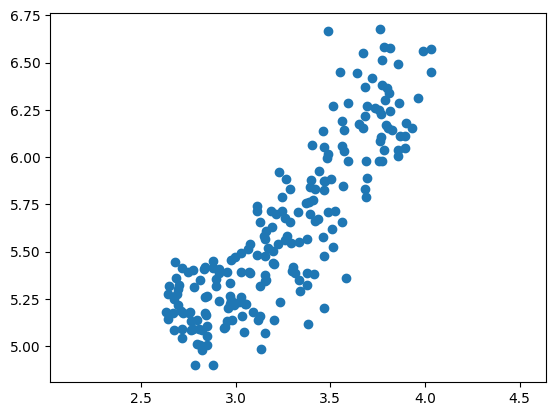

In [9]:
import matplotlib.pyplot as plt
plt.scatter(width, length)
plt.axis('equal')
plt.show()

In [10]:
from scipy.stats import pearsonr
correlation, pvalue = pearsonr(width, length)
print(correlation)

0.8604405325922294


 as expected, the width and length of the grain samples are highly correlated with the correlation of 0.86

### Decorrelating the grain measurements with PCA
You observed in the previous exercise that the width and length measurements of the grain are correlated. Now, you'll use PCA to decorrelate these measurements, then plot the decorrelated points and measure their Pearson correlation.

In [12]:
from sklearn.decomposition import PCA

# create PCA object
pca = PCA()
# fit & transform PCA to sample data
pca_feature = pca.fit_transform(grains_arr)

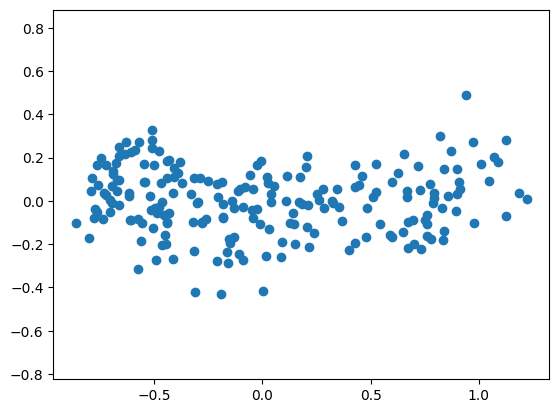

In [14]:
plt.scatter(pca_feature[:,0], pca_feature[:,1])
plt.axis('equal')
plt.show()

In [16]:
# Calculate the Pearson correlation of xs and ys
correlation, pvalue = pearsonr(pca_feature[:,0], pca_feature[:,1])

# Display the correlation
print(correlation)

-1.0158974356189177e-16


Excellent! You've successfully decorrelated the grain measurements with PCA!



## Intrinsic Dimension
### The first principal component
The first principal component of the data is the direction in which the data varies the most. In this exercise, your job is to use PCA to find the first principal component of the length and width measurements of the grain samples, and represent it as an arrow on the scatter plot.

The array grains gives the length and width of the grain samples. PyPlot (plt) and PCA have already been imported for you.

[3.25834928 5.62788995]
2
[[ 0.63917819  0.76905867]
 [-0.76905867  0.63917819]]


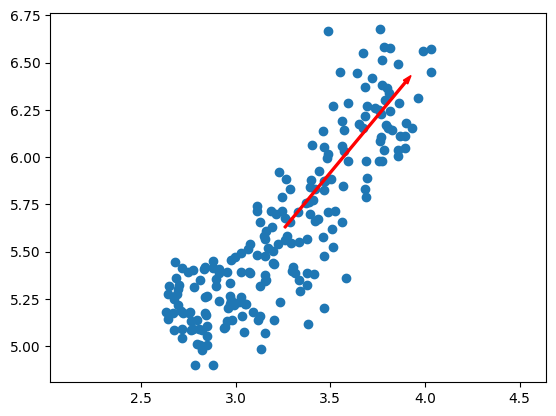

In [17]:
# Make a scatter plot of the untransformed points
plt.scatter(grains_arr[:,0], grains_arr[:,1])

# Create a PCA instance: model
model = PCA()

# Fit model to points
model.fit(grains)

# Get the mean of the grain samples: mean
mean = model.mean_
print(mean)

# Get #principal components
print(model.n_components_)

# Get the first principal component: first_pc
first_pc = model.components_[0,:]
print(model.components_)

# Plot first_pc as an arrow, starting at mean
plt.arrow(mean[0], mean[1], first_pc[0], first_pc[1], color='red', width=0.01)

# Keep axes on same scale
plt.axis('equal')
plt.show()

This is the direction in which the grain data varies the most.

### Variance of the PCA features
The fish dataset is 6-dimensional. But what is its intrinsic dimension? Make a plot of the variances of the PCA features to find out. As before, samples is a 2D array, where each row represents a fish. You'll need to standardize the features first.

In [22]:
# load the fish data
fish = pd.read_csv('https://raw.githubusercontent.com/feliciamargareta/Unsupervised-Learning-K-Means-Clustering/main/fish.csv')
# fish.head()
fish_fea = fish.iloc[:,1:].values
fish_species = fish.iloc[:,0].values


float64


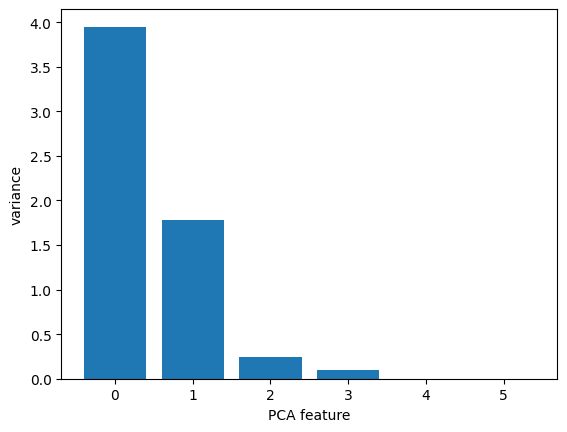

In [23]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(fish_fea)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

It looks like PCA features 0 and 1 have significant variance.
Since PCA features 0 and 1 have significant variance, the intrinsic dimension of this dataset appears to be 2.

### Dimension reduction of the fish measurements
In a previous exercise, you saw that 2 was a reasonable choice for the "intrinsic dimension" of the fish measurements. Now use PCA for dimensionality reduction of the fish measurements, retaining only the 2 most important components.

The fish measurements have already been scaled for you, and are available as scaled_samples.

In [27]:
scaled_fish_fea = scaler.fit_transform(fish_fea)

In [28]:
# Import PCA
from sklearn.decomposition import PCA

# Create a PCA model with 2 components: pca
pca = PCA(n_components=2)

# Fit the PCA instance to the scaled samples
pca.fit(scaled_fish_fea)

# Transform the scaled samples: pca_features
pca_features = pca.transform(scaled_fish_fea)

# Print the shape of pca_features
print(pca_features.shape)

(84, 2)


we successfully reduced the dimensionality from 6 to 2.

### A tf-idf word-frequency array
In this exercise, you'll create a tf-idf word frequency array for a toy collection of documents. For this, use the TfidfVectorizer from sklearn. It transforms a list of documents into a word frequency array, which it outputs as a csr_matrix. It has fit() and transform() methods like other sklearn objects.

You are given a list documents of toy documents about pets. Its contents have been printed in the IPython Shell.

In [29]:
documents = ['cats say meow', 'dogs say woof', 'dogs chase cats']


In [31]:
# Import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Create a TfidfVectorizer: tfidf
tfidf = TfidfVectorizer()

# Apply fit_transform to document: csr_mat
csr_mat = tfidf.fit_transform(documents)

# Print result of toarray() method
print(csr_mat.toarray())

# # Get the words: words
# words = tfidf.get_feature_names()

# # Print words
# print(words)


[[0.51785612 0.         0.         0.68091856 0.51785612 0.        ]
 [0.         0.         0.51785612 0.         0.51785612 0.68091856]
 [0.51785612 0.68091856 0.51785612 0.         0.         0.        ]]
